In [1]:
import numpy as np, matplotlib.pyplot as plt 
from random import random
from collections import Counter
import concurrent.futures as cf

In [2]:
x = [1,2,3,4]
p = [1/4, 1/2, 1/8, 1/8]

def binom(x, p, num):
    dp = [0]
    cumulative = 0
    for i in range(len(p)):
        cumulative += p[i]
        dp.append(cumulative)
    
    generated = []
    for _ in range(num):
        r = random()
        for i in range(len(dp)-1):
            if dp[i] <= r < dp[i+1]:
                generated.append(x[i])
    
    counts = Counter(generated)
    
    return counts

In [3]:
exe = cf.ThreadPoolExecutor()
results = exe.map(binom, [x for _ in range(100)], [p for _ in range(100)], [100 for _ in range(100)])

In [4]:
results = np.array(list(results))

In [5]:
print(results.flatten())

[Counter({2: 44, 1: 21, 3: 20, 4: 15})
 Counter({2: 43, 4: 22, 1: 20, 3: 15})
 Counter({2: 53, 1: 27, 3: 10, 4: 10})
 Counter({2: 45, 1: 25, 4: 19, 3: 11})
 Counter({2: 56, 1: 21, 4: 15, 3: 8}) Counter({2: 55, 1: 24, 4: 13, 3: 8})
 Counter({2: 43, 1: 30, 4: 15, 3: 12})
 Counter({2: 56, 1: 21, 3: 14, 4: 9})
 Counter({2: 49, 1: 24, 3: 17, 4: 10})
 Counter({2: 46, 1: 26, 4: 15, 3: 13})
 Counter({2: 49, 1: 26, 4: 13, 3: 12})
 Counter({2: 41, 1: 25, 3: 19, 4: 15})
 Counter({2: 53, 1: 25, 3: 13, 4: 9}) Counter({2: 58, 1: 21, 3: 12, 4: 9})
 Counter({2: 49, 1: 23, 4: 19, 3: 9})
 Counter({2: 55, 1: 17, 3: 15, 4: 13})
 Counter({2: 55, 1: 22, 4: 13, 3: 10})
 Counter({2: 46, 1: 28, 3: 14, 4: 12})
 Counter({2: 57, 1: 19, 3: 14, 4: 10})
 Counter({2: 43, 1: 31, 3: 14, 4: 12})
 Counter({2: 52, 1: 26, 3: 15, 4: 7}) Counter({2: 61, 1: 18, 3: 13, 4: 8})
 Counter({2: 43, 1: 29, 3: 16, 4: 12})
 Counter({2: 45, 1: 29, 3: 14, 4: 12})
 Counter({2: 50, 1: 20, 3: 19, 4: 11})
 Counter({2: 46, 1: 19, 4: 18, 3: 17

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


<BarContainer object of 4 artists>

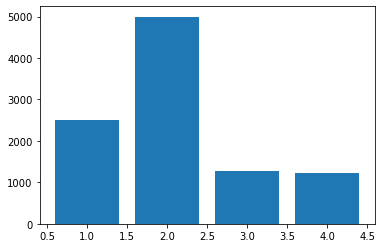

In [6]:
%time
gen = binom(x, p, 10000)
plt.bar(gen.keys(), gen.values())

In [7]:
p01 = lambda t1,t2: np.abs(np.cos(t1/2) * np.sin(t2/2))**2
p10 = lambda t1,t2: np.abs(np.sin(t1/2) * np.cos(t2/2))**2
p00 = lambda t1,t2: np.abs(np.cos(t1/2) * np.cos(t2/2))**2
p11 = lambda t1,t2: np.abs(np.sin(t1/2) * np.sin(t2/2))**2

p0110 = lambda t1,f1,t2,f2: (p01(t1,t2) + p10(t1,t2) + 2 * np.sqrt(p01(t1,t2)*p10(t1,t2)) * np.cos(f2-f1)) / 2

# Gamma functions
G = lambda c0110, c01, c10: (2*c0110 - c01 - c10) / (2 * np.sqrt(c01 * c10))

# F
F = lambda g: g[0]**2 + g[1]**2 + g[2]**2 - 2*g[0]*g[1]*g[2]

In [8]:
# From such distributions the dependence in error of one outcome is taken into account automatically.

In [9]:
N_SHOTS = 2000
ALPHA = 0.005
all_cfs = []
for param in param_list[:]:
    print(f'Begining with param {param}.')
    sample = []
    for _ in range(N_SHOTS):
        print(f'Íteration {_}', end='\r')
        g = []
        for i in range(len(param)):
            t1, f1 = param[i]
            t2, f2 = param[(i+1)%len(param)]
            
            x_singles = ['00', '01', '10', '11']
            p_singles = [p00(t1,t2), p01(t1,t2), p10(t1,t2), p11(t1,t2)]
            x_super = ['0110', 'rest']
            p_super = [p0110(t1,f1,t2,f2), 1-p0110(t1,f1,t2,f2)]
            
            single_counts = binom(x_singles, p_singles, 10_000)
            super_counts = binom(x_super, p_super, 10_000)
            
            c0110 = super_counts['0110']
            c01, c10 = single_counts['01'], single_counts['10']
#             print(c0110, c01, c10)
            g.append(G(c0110, c01, c10))
        g.append(F(g))

        sample.append(g)
        
    sample = np.array(sample)
        
    cfs = []
    for i in range(4):
        data = sample[:,i]
        data.sort()
        ca, cb = data[int(ALPHA * len(data))], data[int((1-ALPHA) * len(data))]
        cfs.append([ca,cb])

    all_cfs.append(cfs)
    print()
    %time
    
#     return all_cfs

NameError: name 'param_list' is not defined

In [ ]:
all_cfs

In [ ]:
all_cfs

In [10]:
param_list = [[(2.1719217426376023, 6.268393886237732),
  (2.6356766096082542, 5.591118337364386),
  (1.43370219758619, 1.751534223664043)],
 [(2.0535894416516953, 0.8055112113224675),
  (0.5721730507490186, 1.8497868484219093),
  (1.7866428260861698, 0.26531682535732953)],
 [(1.40454387035453, 0.21664610714650617),
  (0.6012312746642916, 0.8079199466812678),
  (0.7330021638027037, 1.5166189325975235)],
 [(0.8627009771146144, 3.7359911551709732),
  (0.7574498158644474, 5.920558573378985),
  (2.16026435548721, 4.092347864187471)],
 [(1.9843852694212896, 4.372517249695397),
  (1.0143269501600451, 3.1865781939551217),
  (0.7127914734971253, 0.49594982585205516)],
 [(1.725853570232876, 2.4825591308030974),
  (1.6557062271652745, 4.962953565261901),
  (2.145013525095605, 5.133255299350571)],
 [(1.5056159236046198, 2.397911645068062),
  (1.1667677389372049, 1.019159151096154),
  (0.24190890059795428, 5.727250703093267)],
 [(2.425507852676142, 5.296566520565416),
  (1.7292436435361156, 5.910166317486659),
  (1.3436910611479604, 0.05775185379735403)],
 [(1.1150601873795833, 1.4743757593010134),
  (1.783631757564531, 3.1063995169007015),
  (2.582405591824962, 2.8109037293668555)],
 [(2.8305805576386525, 3.9604226398729714),
  (1.2991523147817339, 1.0406231073260077),
  (1.6242720604197163, 2.6425570166038934)],
 [(2.6291796521428186, 5.899830152275496),
  (2.00027818112629, 6.061937542706739),
  (2.269223522548113, 2.8093969638592826)],
 [(1.2205920589204415, 1.5624740573567633),
  (1.744618571590526, 3.5651053388515863),
  (1.810079315410142, 1.3522797912847706)],
 [(1.1940488055275278, 2.885204728659497),
  (1.315559580890979, 4.720088084275613),
  (2.5628380016506744, 4.770970493554419)],
 [(1.2765877810931812, 1.4204589100477838),
  (2.5304761749907314, 2.8363542008251765),
  (2.8465735061586623, 3.9280865648675514)],
 [(0.7604924219843661, 0.0540248696752599),
  (1.255899832200544, 4.634358051214256),
  (1.9695933737437494, 1.2450748927354163)],
 [(0.4383256173243932, 4.330454680974537),
  (2.416947513648755, 4.651509851197303),
  (1.5932002734616724, 1.407874091264325)],
 [(1.5821814660039262, 2.108962083045599),
  (0.49663434792922573, 1.4529579307123044),
  (2.178455161270646, 1.7314954672049265)],
 [(1.4605603549410788, 4.564280035284574),
  (2.732907505289064, 3.4923605713189585),
  (1.3256894392309686, 1.848631647173036)],
 [(1.6323398007348366, 0.6265777878943285),
  (1.9486061424147172, 3.298065960261993),
  (2.0637223697008498, 5.686516192746191)],
 [(1.1460724253996815, 2.7664138236193794),
  (0.21347412624478843, 4.235961905546003),
  (2.5618307311014594, 4.679398166125037)],
 [(2.4866708414774426, 3.085172779925245),
  (1.2466658773929287, 2.852909315155276),
  (2.2126189677017267, 3.648317668675838)],
 [(1.4585555814046318, 6.101944725367839),
  (1.2832123275056886, 1.6811204700123346),
  (1.2640611596202294, 3.3692976770785723)],
 [(1.5130438179789876, 1.4627794914348748),
  (1.1436237263819393, 0.9036257228256173),
  (0.20430027690869554, 4.0436488681461595)],
 [(0.2178282594728528, 2.9463245222927172),
  (2.618001727526286, 1.7350325415674601),
  (0.3526807293680785, 4.0470078443505555)],
 [(2.1657019376203848, 2.4122968862955814),
  (2.2628557891793015, 0.3540621599052396),
  (0.9454981235534816, 4.856927799861174)]]

In [ ]:
sample

In [ ]:
plt.hist(sample[:,3])

In [11]:
def testrun(param, N_SHOTS):
    
    sample = []
    for _ in range(N_SHOTS):
#         print(f'Íteration {_}', end='\r')
        g = []
        for i in range(len(param)):
            t1, f1 = param[i]
            t2, f2 = param[(i+1)%len(param)]
            
            x_singles = ['00', '01', '10', '11']
            p_singles = [p00(t1,t2), p01(t1,t2), p10(t1,t2), p11(t1,t2)]
            x_super = ['0110', 'rest']
            p_super = [p0110(t1,f1,t2,f2), 1-p0110(t1,f1,t2,f2)]
            
            single_counts = binom(x_singles, p_singles, 10_000)
            super_counts = binom(x_super, p_super, 10_000)
            
            c0110 = super_counts['0110']
            c01, c10 = single_counts['01'], single_counts['10']
#             print(c0110, c01, c10)
            g.append(G(c0110, c01, c10))
        g.append(F(g))

        sample.append(g)
        
    sample = np.array(sample)
    
    return sample

In [ ]:
%%time
exe = cf.ThreadPoolExecutor()
results = exe.map(testrun, [param_list[0] for _ in range(10)], [200 for _ in range(10)])
results = np.array(list(results))

In [ ]:
results

In [ ]:
results.reshape((10_000,4))

In [ ]:
%%time
import time
time.sleep(5)